In [134]:
# create TIF from CSV for coarse census

import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.features import geometry_mask
from osgeo import ogr
from osgeo import gdal
import numpy as np
from utils import plot_2dmatrix, create_map_of_valid_ids
import config_pop as cfg




In [135]:
path = "/scratch3/ldominiak/luca_pomelo_input_data/CHE/CHE_Census_Data/che_population_2000_2020.csv"
data = pd.read_csv(path)

In [136]:
path = "/scratch3/ldominiak/luca_pomelo_input_data/CHE/CHE_Census_Data/che_subnational_admin_2000_2020.tif"
raster = rio.open(path)
### Census data


In [137]:
band1 = raster.read()
indexex_overview = np.unique(band1)
indexex_overview.tolist()

cr_census_arr = [0,]
valid_ids = []

for i in range(len(data)):
    if np.any(data["GID"][i] in indexex_overview):
        cr_census_arr.append(data["P_2020"][i])
    else:
        pass
    valid_ids.append(np.where((data["GID"][i] == indexex_overview))[0][0])
    #no_valid_ids.append()

cr_census_arr = np.asarray(cr_census_arr, dtype = 'float32')

cr_census = {i: val for i, val in enumerate(cr_census_arr) if val > 0} # dict mit korrespondenzen zu coarse census aus wp daten

### Census data

In [145]:
no_valid_ids = cfg.metadata["che"]["wp_no_data"]

In [146]:
no_valid_ids

[0]

In [141]:
CHE_raster_path = cfg.metadata["che"]["rst_wp_regions_path"]
raster = gdal.Open(CHE_raster_path)
geo_transform = raster.GetGeoTransform()
projection = raster.GetProjection()
geo_metadata = {"geo_transform": geo_transform, "projection": projection}

geo_metadata


{'geo_transform': (5.956249991169983,
  0.00083333333,
  0.0,
  47.81458334345,
  0.0,
  -0.00083333333),
 'projection': 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'}

[0, 756872548, 756872549, 756872550, 756872551, 756872552, 756872553, 756872554, 756872555, 756872556, 756872557, 756872558, 756872559, 756872560, 756872561, 756872562, 756872563, 756872564, 756872565, 756872566, 756872567, 756872568, 756872569, 756872570, 756872571, 756872572, 756872573, 756872574, 756872575, 756872576, 756872577, 756872578, 756872579, 756872580, 756872581, 756872582, 756872583, 756872584, 756872585, 756872586, 756872587, 756872588, 756872589, 756872590, 756872591, 756872592, 756872593, 756872594, 756872595, 756872596, 756872597, 756872598, 756872599, 756872600, 756872601, 756872602, 756872603, 756872604, 756872605, 756872606, 756872607, 756872608, 756872609, 756872610, 756872611, 756872612, 756872613, 756872614, 756872615, 756872616, 756872617, 756872618, 756872619, 756872620, 756872621, 756872622, 756872623, 756872624, 756872625, 756872626, 756872627, 756872628, 756872629, 756872630, 756872631, 756872632, 756872633, 756872634, 756872635, 756872636, 756872637, 756872

<Figure size 432x288 with 0 Axes>

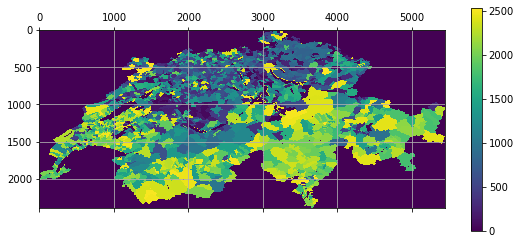

In [142]:
fine_regions = gdal.Open(CHE_raster_path).ReadAsArray().astype(np.uint32)

unique_list = list(np.unique(fine_regions)) ### mache liste aus validen ids
unique_list = unique_list[2:]### die ersten beiden braucht man nicht
unique_list.insert(0,0) 
print(unique_list)

h = fine_regions.shape[0]
w = fine_regions.shape[1]

relabel = np.zeros((h, w), dtype=np.int32)

for i,idx in enumerate(unique_list):
    relabel[fine_regions==idx] = i
    

#relabel ### those are coarse regions basically visualized down below; line 61 in superpixel script
np.unique(relabel)

plot_2dmatrix(relabel)





<Figure size 432x288 with 0 Axes>

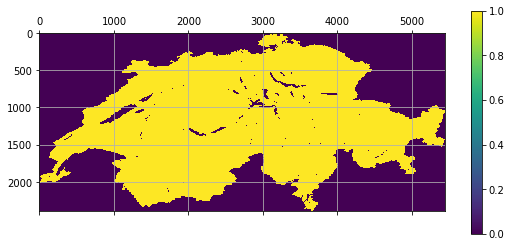

In [143]:
map_valid_ids = create_map_of_valid_ids(relabel, no_valid_ids)

np.unique(map_valid_ids)

plot_2dmatrix(map_valid_ids)